# Read Data

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings("ignore")

A=pd.read_csv("C:/Users/Dell/Downloads/AirPassengers.csv")

In [2]:
A.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
A.index=pd.to_datetime(A.Month)

In [4]:
A=A.drop(labels=["Month"],axis=1)
A.columns=["Pass"]
A.head(10)

,Pass
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


<AxesSubplot:xlabel='Month'>

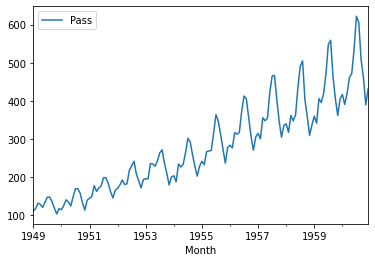

In [5]:
A.plot()

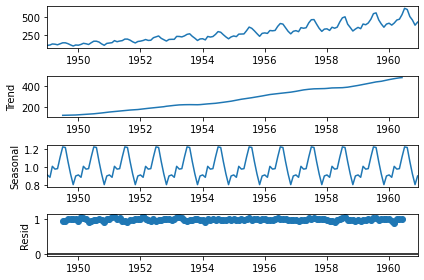

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
W=seasonal_decompose(A,model="multiplicative")
W.plot()
plt.show()


<AxesSubplot:xlabel='Month'>

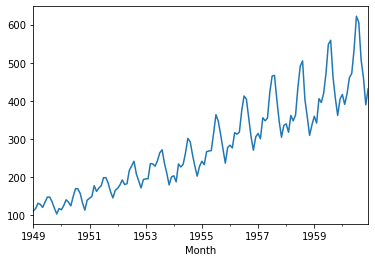

In [7]:
W.observed.plot()

<AxesSubplot:xlabel='Month'>

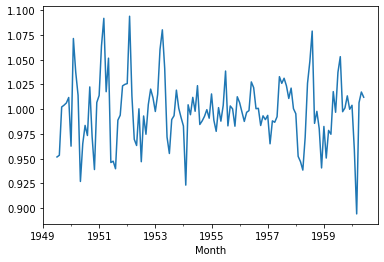

In [8]:
W.resid.plot()

<AxesSubplot:xlabel='Month'>

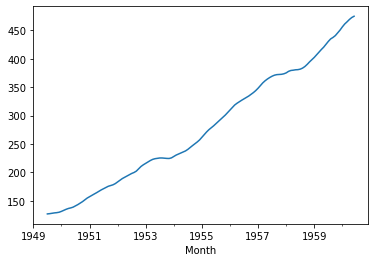

In [9]:
W.trend.plot()

<AxesSubplot:xlabel='Month'>

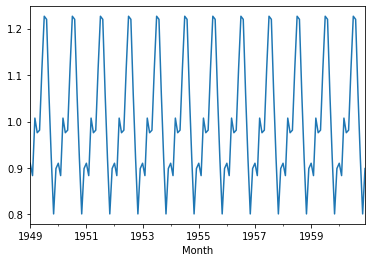

In [10]:
W.seasonal.plot()

In [11]:
RM_A=A.rolling(window=12).mean()
#RS_A=A.rolling(window=12).std()

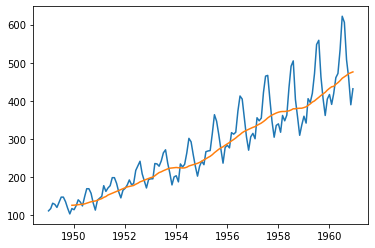

In [12]:
plt.plot(A)
plt.plot(RM_A)
#plt.plot(RS_A)

In [13]:
from numpy import log
LOG_A=log(A)
RM_LOG_A=LOG_A.rolling(window=12).mean()

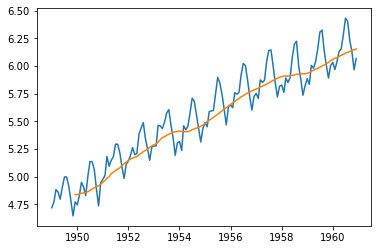

In [14]:
plt.plot(LOG_A)
plt.plot(RM_LOG_A)

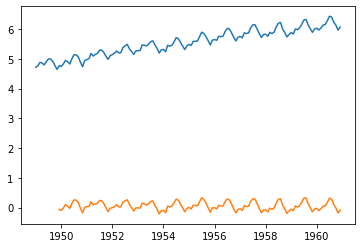

In [15]:
plt.plot(LOG_A)
plt.plot(LOG_A-RM_LOG_A)

In [16]:
TS_new=LOG_A-RM_LOG_A

In [17]:
TS_new

,Pass
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
...,...
1960-08-01,0.282363
1960-09-01,0.098235
1960-10-01,-0.009230


In [18]:
TS_new=TS_new[TS_new.Pass.isna()==False]

In [19]:
TS_new.shape

(133, 1)

In [20]:
trd=TS_new[0:106]
tsd=TS_new[106:134]

In [21]:
from statsmodels.tsa.ar_model import AR
model = AR(trd).fit()

F:\work\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [22]:
#tsd

In [23]:
pred=model.predict(start="1958-10-01",end="1960-12-01")

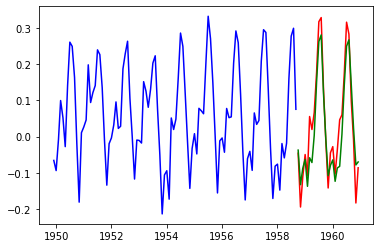

In [24]:
plt.plot(trd,c="blue")
plt.plot(tsd,c="red")
plt.plot(pred,c="green")

In [25]:
pred

1958-10-01   -0.037129
1958-11-01   -0.132256
1958-12-01   -0.086974
1959-01-01   -0.062510
1959-02-01   -0.136801
1959-03-01   -0.058226
1959-04-01   -0.071314
1959-05-01    0.003243
1959-06-01    0.149653
1959-07-01    0.261725
1959-08-01    0.280068
1959-09-01    0.116718
1959-10-01   -0.006373
1959-11-01   -0.107281
1959-12-01   -0.079117
1960-01-01   -0.064088
1960-02-01   -0.123009
1960-03-01   -0.086333
1960-04-01   -0.081786
1960-05-01    0.006613
1960-06-01    0.142615
1960-07-01    0.248930
1960-08-01    0.266477
1960-09-01    0.143491
1960-10-01    0.023656
1960-11-01   -0.077912
1960-12-01   -0.069704
Freq: MS, dtype: float64

TS_new=LOG_A_RM_LOG_A

In [26]:
from numpy import exp
exp(pred+RM_LOG_A.tail(27).Pass)

1958-10-01    362.074874
1958-11-01    329.665472
1958-12-01    345.022132
1959-01-01    355.254891
1959-02-01    331.825018
1959-03-01    362.397462
1959-04-01    361.557750
1959-05-01    394.308061
1959-06-01    459.595119
1959-07-01    518.826980
1959-08-01    532.924005
1959-09-01    457.780063
1959-10-01    409.016492
1959-11-01    374.566527
1959-12-01    391.212539
1960-01-01    402.030491
1960-02-01    383.279617
1960-03-01    398.643488
1960-04-01    405.564367
1960-05-01    447.378802
1960-06-01    517.934425
1960-07-01    582.144687
1960-08-01    596.448665
1960-09-01    531.518149
1960-10-01    476.412618
1960-11-01    433.080844
1960-12-01    439.005306
Freq: MS, dtype: float64